# Analysis example for exploring power law distributions

In this notebook we explore power law distributions to gain familiarity with them.

See https://www.nature.com/articles/srep00812 to recognize that mixtures of power laws do not, themselves, yield a power law! Also, if you take the bottom half of data from a power law, you will not get a power law.

Original is in my github repo: https://github.com/carbocation/jupyter/blob/master/powerlaws.ipynb

## Setup

First, be sure to run notebook **`R environment setup`** in this workspace.

In [1]:
# Installing packages only if not found, via https://stackoverflow.com/a/4090208/199475
list.of.packages <- c('poweRlaw')
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing package into ‘/home/jupyter-user/.rpackages’
(as ‘lib’ is unspecified)
also installing the dependency ‘VGAM’



In [2]:
GetRanks <- function(x) {
    return(1+length(x)-seq(1, length(x)))
}

# Generate a vector with 5k power-law distributed values 
# with scaling factor of 3, starting at 1
x <- poweRlaw::rpldis(50000, 1, 3, discrete_max=10000)

## Plot the full distribution

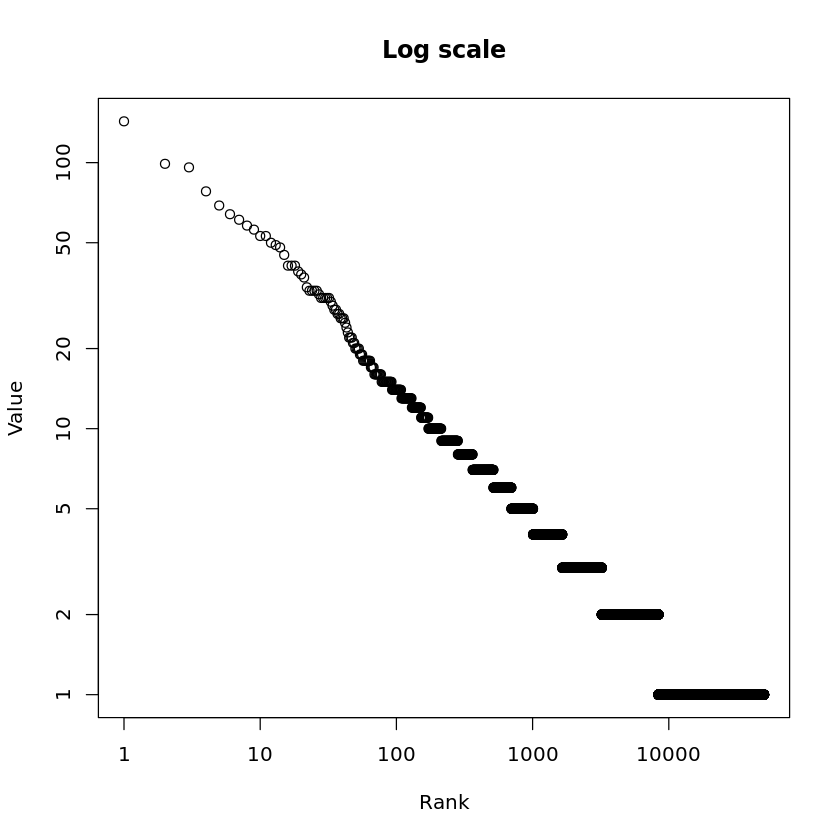

In [3]:
(function() {
    # Plot them. Note that the order (with regard to the rank of the x values) matters.
    plot(GetRanks(x), sort(x), log="xy", xlab="Rank", ylab="Value", main="Log scale")
})()

## Take the bottom 95% of the distribution and see if it still looks like a power law (no)

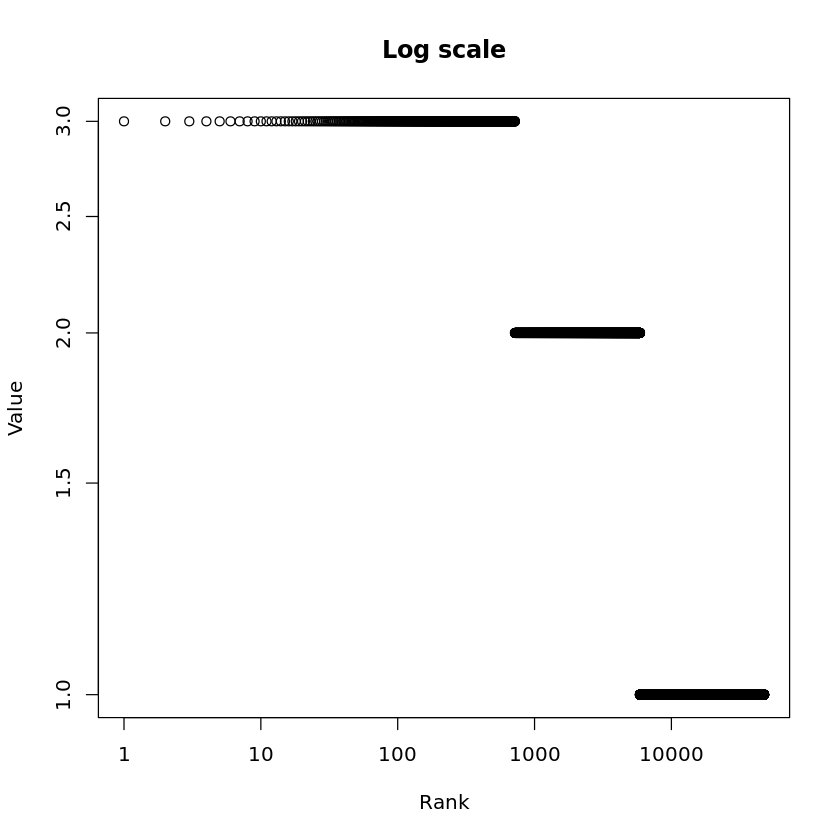

In [4]:
(function() {
    N <- 0.95*length(x)
    #partials <- sort(x)[(length(x)-N):(length(x)-1)]
    partials <- sort(x)[1:N]
    plot(GetRanks(partials), sort(partials), log="xy", xlab="Rank", ylab="Value", main="Log scale")
})()

## Take the top 5% of the distribution and see if it still looks like a power law (yes)

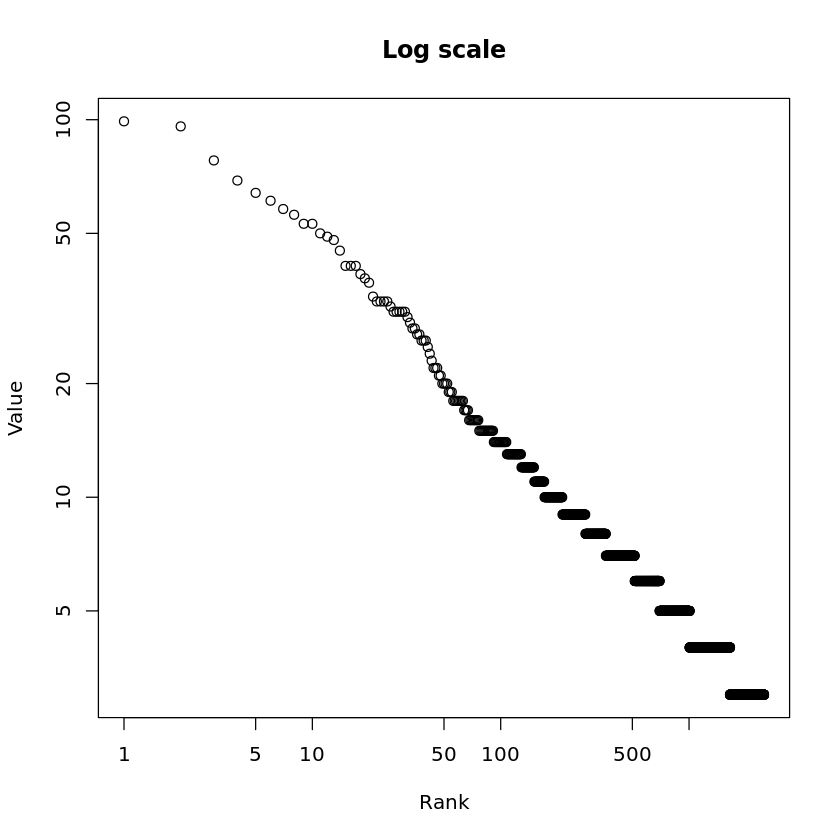

In [5]:
(function() {
    N <- 0.05*length(x)
    partials <- sort(x)[(length(x)-N):(length(x)-1)]
    plot(GetRanks(partials), sort(partials), log="xy", xlab="Rank", ylab="Value", main="Log scale")
})()

# Provenance

In [6]:
devtools::session_info()

─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 3.5.2 (2018-12-20)
 os       Debian GNU/Linux 9 (stretch)
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2019-05-02                  

─ Packages ───────────────────────────────────────────────────────────────────
 package     * version     date       lib source                            
 assertthat    0.2.1       2019-03-21 [2] CRAN (R 3.5.2)                    
 backports     1.1.4       2019-04-10 [1] CRAN (R 3.5.2)                    
 base64enc     0.1-3       2015-07-28 [2] CRAN (R 3.5.2)                    
 callr         3.2.0       2019-03-15 [2] CRAN (R 3.5.2)                    
 cli           1.1.0       2019-03-19 [2] CRAN (R 3.5.2)          

Copyright 2018 The Broad Institute, Inc., Verily Life Sciences, LLC All rights reserved.

This software may be modified and distributed under the terms of the BSD license. See the LICENSE file for details.